<a href="https://colab.research.google.com/github/BrilliantChard/Data-Science-Projects/blob/main/Signal%20Mterics%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/signal_metrics.csv')
df.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time
display(df.head())

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Date,Time
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000,2023-05-05,12:50:40
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892,2023-05-05,12:53:47.210173
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070,2023-05-05,12:56:54.420346
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698,2023-05-05,13:00:01.630519
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467,2023-05-05,13:03:08.840692


In [8]:
df = df.drop(columns=['Timestamp'])
df = df.set_index(['Date', 'Time'])
display(df.head())

Locality   Latitude  Longitude  \
Date       Time                                                       
2023-05-05 12:50:40                  Anisabad  25.599109  85.137355   
           12:53:47.210173        Fraser Road  25.433286  85.070053   
           12:56:54.420346  Boring Canal Road  25.498809  85.211371   
           13:00:01.630519            Danapur  25.735138  85.208400   
           13:03:08.840692    Phulwari Sharif  25.538556  85.159860   

                            Signal Strength (dBm)  Signal Quality (%)  \
Date       Time                                                         
2023-05-05 12:50:40                    -84.274113                 0.0   
           12:53:47.210173             -97.653121                 0.0   
           12:56:54.420346             -87.046134                 0.0   
           13:00:01.630519             -94.143159                 0.0   
           13:03:08.840692             -94.564765                 0.0   

                            Data Throughput (Mbps)  Latency (ms) Network Type  \
Date       Time                                                                 
2023-05-05 12:50:40                       1.863890    129.122914           3G   
           12:53:47.210173                5.132296     54.883606           4G   
           12:56:54.420346                1.176985    119.598286          LTE   
           13:00:01.630519               68.596932     46.598387           5G   
           13:03:08.840692               38.292038     30.342828           5G   

                            BB60C Measurement (dBm)  srsRAN Measurement (dBm)  \
Date       Time                                                                 
2023-05-05 12:50:40                        0.000000                  0.000000   
           12:53:47.210173               -95.810791               -105.452359   
           12:56:54.420346               -91.593861                -95.419482   
           13:00:01.630519               -90.642773               -101.895905   
           13:03:08.840692               -90.489100               -103.318304   

                            BladeRFxA9 Measurement (dBm)  
Date       Time                                           
2023-05-05 12:50:40                             0.000000  
           12:53:47.210173                    -99.920892  
           12:56:54.420346                    -87.714070  
           13:00:01.630519                    -96.570698  
           13:03:08.840692                    -95.102467

In [9]:
df.describe()

,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
count,16829.000000,16829.000000,16829.000000,16829.0,16829.000000,16829.000000,16829.000000,16829.000000,16829.000000
mean,25.594796,85.137314,-90.072484,0.0,16.182856,101.313624,-68.820150,-74.439562,-68.819930
std,0.089881,0.090095,5.399368,0.0,25.702734,56.010418,40.046739,43.215204,39.996934
min,25.414575,84.957936,-116.942267,0.0,1.000423,10.019527,-115.667514,-124.652054,-119.207545
25%,25.522858,85.064124,-93.615962,0.0,2.001749,50.320775,-94.021959,-101.249987,-93.749032
50%,25.595383,85.138149,-89.665566,0.0,2.997175,100.264318,-89.126942,-96.838442,-89.282746
75%,25.667620,85.209504,-86.145491,0.0,9.956314,149.951112,0.000000,0.000000,0.000000
max,25.773648,85.316994,-74.644848,0.0,99.985831,199.991081,0.000000,0.000000,0.000000


In [10]:
df.drop('Signal Quality (%)', axis = 1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16829 entries, (datetime.date(2023, 5, 5), datetime.time(12, 50, 40)) to (datetime.date(2023, 6, 10), datetime.time(23, 56, 52, 791244))
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Locality                      16829 non-null  object 
 1   Latitude                      16829 non-null  float64
 2   Longitude                     16829 non-null  float64
 3   Signal Strength (dBm)         16829 non-null  float64
 4   Data Throughput (Mbps)        16829 non-null  float64
 5   Latency (ms)                  16829 non-null  float64
 6   Network Type                  16829 non-null  object 
 7   BB60C Measurement (dBm)       16829 non-null  float64
 8   srsRAN Measurement (dBm)      16829 non-null  float64
 9   BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.0+ MB


In [15]:
df.isnull().sum()

,0
Locality,0
Latitude,0
Longitude,0
Signal Strength (dBm),0
Data Throughput (Mbps),0
Latency (ms),0
Network Type,0
BB60C Measurement (dBm),0
srsRAN Measurement (dBm),0
BladeRFxA9 Measurement (dBm),0


<Axes: >

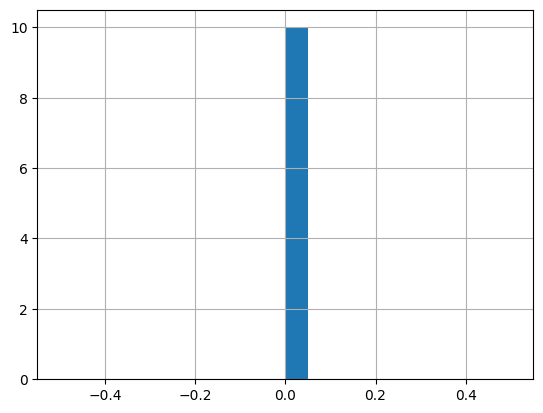

In [16]:
df.isnull().sum().hist(bins=20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16829 entries, (datetime.date(2023, 5, 5), datetime.time(12, 50, 40)) to (datetime.date(2023, 6, 10), datetime.time(23, 56, 52, 791244))
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Locality                      16829 non-null  object 
 1   Latitude                      16829 non-null  float64
 2   Longitude                     16829 non-null  float64
 3   Signal Strength (dBm)         16829 non-null  float64
 4   Data Throughput (Mbps)        16829 non-null  float64
 5   Latency (ms)                  16829 non-null  float64
 6   Network Type                  16829 non-null  object 
 7   BB60C Measurement (dBm)       16829 non-null  float64
 8   srsRAN Measurement (dBm)      16829 non-null  float64
 9   BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.0+ MB


In [25]:
average_signal_strength = df.groupby('Date')['Signal Strength (dBm)'].mean().reset_index()
average_signal_strength = average_signal_strength[['Date', 'Signal Strength (dBm)']]
print(f"The average signal strenth is: \n{average_signal_strength}")

The average signal strenth is: 
          Date  Signal Strength (dBm)
0   2023-05-05             -90.030558
1   2023-05-06             -90.246715
2   2023-05-07             -90.095542
3   2023-05-08             -90.034323
4   2023-05-09             -90.383115
5   2023-05-10             -90.477647
6   2023-05-11             -89.972573
7   2023-05-12             -90.209019
8   2023-05-13             -90.244751
9   2023-05-14             -90.109835
10  2023-05-15             -89.734832
11  2023-05-16             -90.205200
12  2023-05-17             -90.425138
13  2023-05-18             -90.441202
14  2023-05-19             -90.113597
15  2023-05-20             -90.170255
16  2023-05-21             -90.327432
17  2023-05-22             -89.979762
18  2023-05-23             -90.026879
19  2023-05-24             -90.002412
20  2023-05-25             -89.922219
21  2023-05-26             -90.605624
22  2023-05-27             -89.769941
23  2023-05-28             -89.878182
24  2023-05-29    

In [26]:
df.columns.to_list()

['Locality',
 'Latitude',
 'Longitude',
 'Signal Strength (dBm)',
 'Data Throughput (Mbps)',
 'Latency (ms)',
 'Network Type',
 'BB60C Measurement (dBm)',
 'srsRAN Measurement (dBm)',
 'BladeRFxA9 Measurement (dBm)']

In [27]:
df.columns = ['Locality', 'Latitude', 'Longitude', 'Signal Strength', 'Throughput', 'Latency', 'Network Type', 'BB60C Measurement', 'srsRAN Measurement', 'BladeRFxA9 Measurement']

In [28]:
df.columns.to_list()

['Locality',
 'Latitude',
 'Longitude',
 'Signal Strength',
 'Throughput',
 'Latency',
 'Network Type',
 'BB60C Measurement',
 'srsRAN Measurement',
 'BladeRFxA9 Measurement']

### Average Signal Strength by Latitude

In [30]:
average_signal_strength_by_latitude = df.groupby('Latitude')['Signal Strength'].mean().reset_index()
average_signal_strength_by_latitude

,Latitude,Signal Strength
0,25.414575,-90.987995
1,25.414585,-99.792494
2,25.414615,-85.432328
3,25.415067,-86.299507
4,25.415288,-89.744015
...,...,...
16824,25.772781,-89.363429
16825,25.773123,-89.001536
16826,25.773137,-87.896587
16827,25.773446,-91.943810


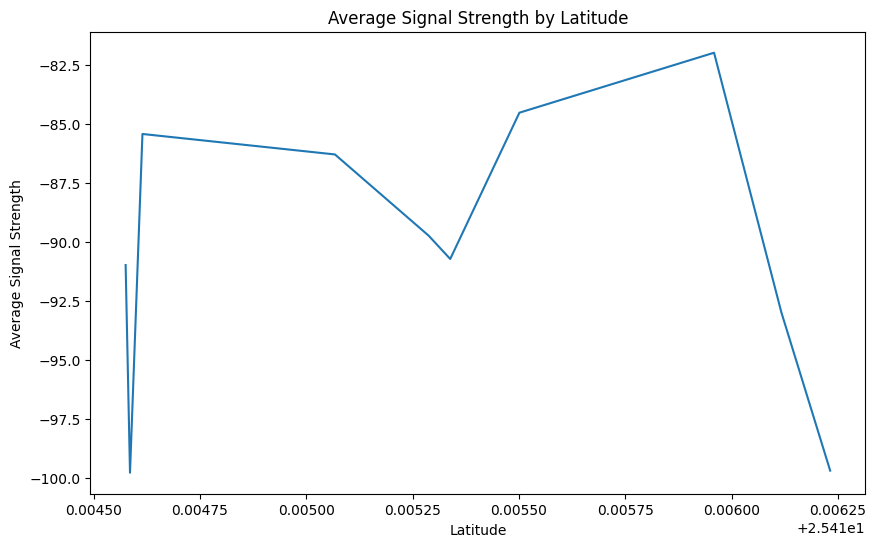

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_signal_strength_by_latitude['Latitude'].head(10), y=average_signal_strength_by_latitude['Signal Strength'].head(10))
plt.title('Average Signal Strength by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Average Signal Strength')
plt.show()

### Average Signal Strength by Longitude

In [36]:
average_signal_strength_by_longitude = df.groupby('Longitude')['Signal Strength'].mean().reset_index()
average_signal_strength_by_longitude

,Longitude,Signal Strength
0,84.957936,-89.687141
1,84.958299,-92.522340
2,84.958387,-87.962497
3,84.958883,-85.491498
4,84.959015,-84.709438
...,...,...
16824,85.315862,-86.641136
16825,85.315884,-92.788816
16826,85.316025,-85.008563
16827,85.316132,-85.617047


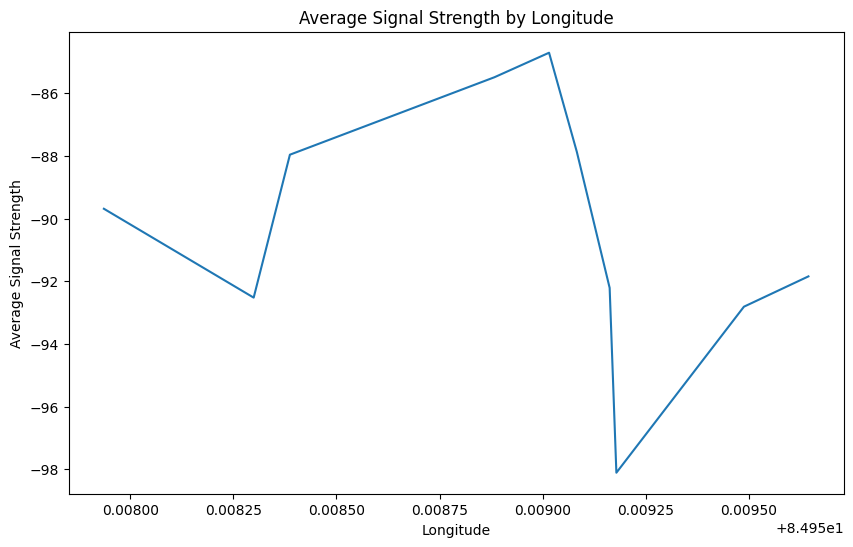

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_signal_strength_by_longitude['Longitude'].head(10), y=average_signal_strength_by_longitude['Signal Strength'].head(10))
plt.title('Average Signal Strength by Longitude')
plt.xlabel('Longitude')
plt.ylabel('Average Signal Strength')
plt.show()

### Correlation between Latitude, Longitude, and Signal Strength

In [38]:
correlation_matrix = df[['Latitude', 'Longitude', 'Signal Strength']].corr()
display(correlation_matrix)

,Latitude,Longitude,Signal Strength
Latitude,1.000000,-0.000686,-0.012869
Longitude,-0.000686,1.000000,-0.010267
Signal Strength,-0.012869,-0.010267,1.000000


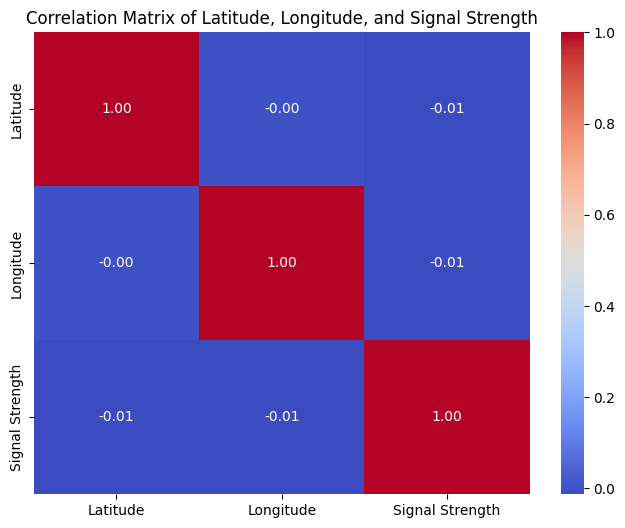

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Latitude, Longitude, and Signal Strength')
plt.show()

<Axes: title={'center': 'Pie chart showing the Different Network Types'}, ylabel='count'>

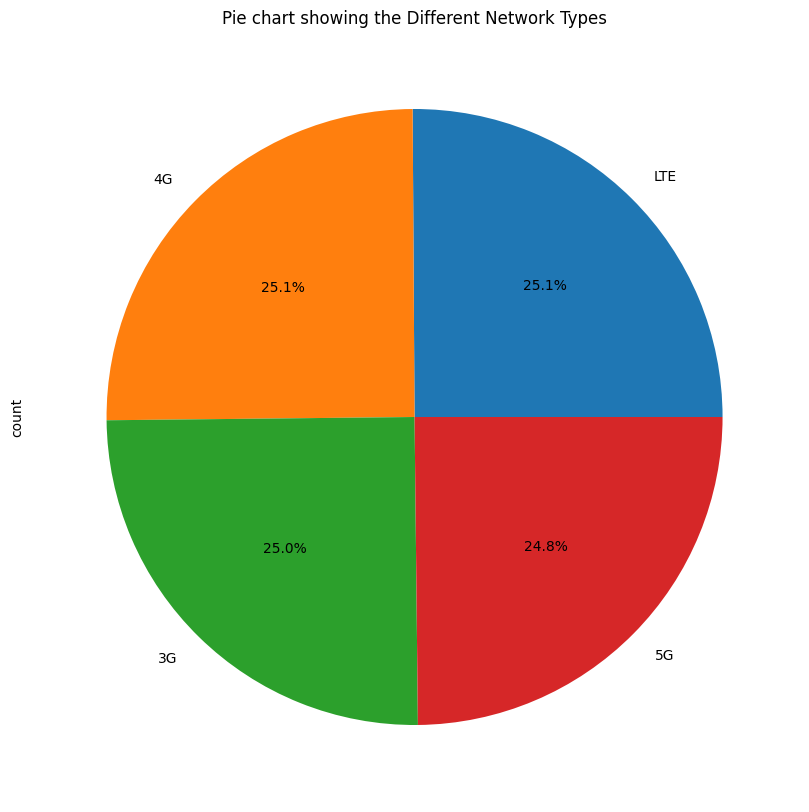

In [41]:
df['Network Type'].value_counts().plot(kind='pie', title='Pie chart showing the Different Network Types', figsize=(10, 10), autopct='%1.1f%%')